In [1]:
# 构建PLTS
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
Data = []
indexes={'舒适':0,'耐久':0,'精细':0,'保障':0,'牌证':0,'外观':0,'外部':0,'响应':0,'沟通':0,'信息':0,'补偿':0,'服务':0}
PLTS={'舒适':pd.DataFrame(),'耐久':pd.DataFrame(),'精细':pd.DataFrame(),'保障':pd.DataFrame(),'牌证':pd.DataFrame(),'外观':pd.DataFrame(),'外部':pd.DataFrame(),
      '响应':pd.DataFrame(),'沟通':pd.DataFrame(),'信息':pd.DataFrame(),'补偿':pd.DataFrame(),'服务':pd.DataFrame()}
pinpais=['ALBD','AND','AT','BNL','GRN','LN','QPL','TB']
id2label = {0:'舒适',1:'耐久',2:'精细',3:'保障',4:'牌证',5:'外观',6:'外部',7:'响应及时性',8:'沟通有效性',9:'信息安全性',10:'补偿合理性',11:'服务专业性'}
for pinpai in pinpais:
    data = pd.read_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优PROMETHEE-II过程\A比例_'+pinpai+'.csv',index_col=0)
    data.columns = list(PLTS.keys())
    Data.append(data)

for each_weidu in PLTS.keys():
    i = 0
    for each in Data:
        d = pd.DataFrame(each[each_weidu])
        d['品牌'] = [pinpais[i]]*3
        d['情感'] = [1,2,3]
        d.columns = ['比例','品牌','情感']
        PLTS[each_weidu] = PLTS[each_weidu].append(d)
        i +=1

print(PLTS)

{'舒适':        比例    品牌  情感
0  0.0936  ALBD   1
1  0.1148  ALBD   2
2  0.7916  ALBD   3
0  0.0741   AND   1
1  0.1061   AND   2
2  0.8198   AND   3
0  0.1855    AT   1
1  0.1566    AT   2
2  0.6579    AT   3
0  0.1460   BNL   1
1  0.1524   BNL   2
2  0.7015   BNL   3
0  0.0684   GRN   1
1  0.0908   GRN   2
2  0.8408   GRN   3
0  0.1805    LN   1
1  0.1569    LN   2
2  0.6626    LN   3
0  0.1306   QPL   1
1  0.1991   QPL   2
2  0.6703   QPL   3
0  0.1079    TB   1
1  0.0969    TB   2
2  0.7952    TB   3, '耐久':        比例    品牌  情感
0  0.4304  ALBD   1
1  0.0815  ALBD   2
2  0.4881  ALBD   3
0  0.5161   AND   1
1  0.1279   AND   2
2  0.3560   AND   3
0  0.6231    AT   1
1  0.1897    AT   2
2  0.1872    AT   3
0  0.6818   BNL   1
1  0.1431   BNL   2
2  0.1751   BNL   3
0  0.6385   GRN   1
1  0.0636   GRN   2
2  0.2979   GRN   3
0  0.6662    LN   1
1  0.1316    LN   2
2  0.2022    LN   3
0  0.6072   QPL   1
1  0.2084   QPL   2
2  0.1845   QPL   3
0  0.2153    TB   1
1  0.0556    TB   2
2  0.7

In [2]:
import os
if not os.path.exists('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程'):
    os.mkdir('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程')
for weidu in PLTS.keys():
    DATA=PLTS[weidu].set_index(['品牌','情感']).unstack().fillna(0).T.to_numpy()
    print(DATA)
    pd.DataFrame(DATA,index=[0,1,2],columns=pinpais).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\A比例_'+weidu+'.csv',index=[0,1,2])

[[0.0936 0.0741 0.1855 0.146  0.0684 0.1805 0.1306 0.1079]
 [0.1148 0.1061 0.1566 0.1524 0.0908 0.1569 0.1991 0.0969]
 [0.7916 0.8198 0.6579 0.7015 0.8408 0.6626 0.6703 0.7952]]
[[0.4304 0.5161 0.6231 0.6818 0.6385 0.6662 0.6072 0.2153]
 [0.0815 0.1279 0.1897 0.1431 0.0636 0.1316 0.2084 0.0556]
 [0.4881 0.356  0.1872 0.1751 0.2979 0.2022 0.1845 0.7292]]
[[0.2051 0.0927 0.1803 0.2841 0.1629 0.276  0.3015 0.1296]
 [0.1359 0.0715 0.1187 0.1452 0.061  0.1574 0.2313 0.0557]
 [0.659  0.8358 0.701  0.5707 0.7761 0.5666 0.4672 0.8148]]
[[0.2829 0.1115 0.2596 0.327  0.1265 0.2701 0.3478 0.1778]
 [0.1693 0.1452 0.183  0.1677 0.0815 0.1702 0.2265 0.1145]
 [0.5478 0.7434 0.5573 0.5053 0.7919 0.5597 0.4257 0.7077]]
[[9.654e-01 1.000e+00 9.774e-01 9.493e-01 9.796e-01 9.852e-01 9.738e-01
  9.674e-01]
 [3.340e-02 0.000e+00 1.910e-02 1.600e-02 0.000e+00 6.300e-03 2.520e-02
  3.180e-02]
 [1.300e-03 0.000e+00 3.500e-03 3.470e-02 2.040e-02 8.600e-03 9.000e-04
  9.000e-04]]
[[0.0728 0.0497 0.0994 0.1635 0.

In [3]:
# F函数返回各维度的概率分布函数，x情感值，k维度
def F(k,x,DATA):
    summ=0
    for i in range(0,x+1):
        summ=summ+DATA[i][k]
    return summ
def ssd(F,k,x,DATA):
    summ=0
    for i in range(0,x+1):
        summ=summ+F(k,i,DATA)
    return summ
def tsd(F,k,x,DATA):
    summ=0
    for i in range(0,x+1):
        summ=summ+ssd(F,k,i,DATA)
    return summ
def suiji(k1,k2,DATA):
    dataframe=pd.DataFrame({'flag1':[],'flag2':[],'flag3':[],})
    E=np.zeros(len(pinpais))
    for j in range(0,len(pinpais)):
        E[j]=np.sum([DATA[i][j]*(i+1) for i in [0,1,2]])
    for i in np.arange(0,3):
        dataframe.loc[i]=[F(k1,i,DATA)-F(k2,i,DATA),ssd(F,k1,i,DATA)-ssd(F,k2,i,DATA),tsd(F,k1,i,DATA)-tsd(F,k2,i,DATA)]
    if dataframe.loc[dataframe["flag1"]>0].empty:
        return 'FSD'
    elif dataframe.loc[dataframe["flag2"]>0].empty:
        return 'SSD'
    elif dataframe.loc[dataframe["flag3"]>0].empty and E[k1]>E[k2]:
        return 'TSD'
    else:
        return '--'
def sur(k1,h1,ss,DATA):
    # k占优于h
    data=DATA.T.cumsum(axis=1)
    if  ss[k1,h1] in ['FSD','SSD','TSD']:
        S1=0;S2=0;S3=0
        for i in range(0,3):
            S1=S1+data[h1][i]
            if data[h1][i]>data[k1][i]:
                S2=S2+data[h1][i]-data[k1][i]
            elif data[h1][i]<data[k1][i]:
                S3=S3+data[k1][i]-data[h1][i]
        return np.round((S2-S3)/S1,4)
    else:
        return '--'

def Hasses(ss):
    result=[]
    for i in range(0,len(ss)):
        Fs=0;Os=0
        for j in range(0,len(ss[i])):
            if ss[i,j] in ['FSD','SSD','TSD']:
                Os+=1
            if ss[j,i] in ['FSD','SSD','TSD']:
                Fs+=1
        try:
            result.append(round((len(ss)+1)*Os/(Fs+Os),2))
        except:
            result.append(0)
    return result

H=[]
for weidu in PLTS.keys():
    # 随机占优关系
    DATA=PLTS[weidu].set_index(['品牌','情感']).unstack().fillna(0).T.to_numpy()
    ss=np.array([['None'] * len(pinpais)]* len(pinpais))
    for i in range(0,len(pinpais)):
        for j in range(0,len(pinpais)):
            ss[i,j]='--' if i==j else suiji(i,j,DATA)
    pd.DataFrame(ss,index=pinpais,columns=pinpais).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\B随机占优关系_'+weidu+'.csv')
    # 随机占优程度
    SUR=np.array([['None'] * len(pinpais)]* len(pinpais))
    for i in range(0,len(pinpais)):
        for j in range(0,len(pinpais)):
            SUR[i,j]=sur(i,j,ss,DATA)
    pd.DataFrame(SUR).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\C随机占程度_'+weidu+'.csv')
    # HASSE图构建
    H.append(Hasses(ss))
    print(ss)
print('秩均值矩阵_待处理',H,sep='\n')

[['--' '--' 'FSD' 'SSD' '--' 'FSD' 'FSD' 'SSD']
 ['FSD' '--' 'FSD' 'SSD' '--' 'FSD' 'FSD' 'FSD']
 ['--' '--' '--' '--' '--' '--' '--' '--']
 ['--' '--' 'FSD' '--' '--' 'FSD' '--' '--']
 ['FSD' 'FSD' 'FSD' 'SSD' '--' 'FSD' 'FSD' 'FSD']
 ['--' '--' 'FSD' '--' '--' '--' '--' '--']
 ['--' '--' 'FSD' '--' '--' 'FSD' '--' '--']
 ['--' '--' 'FSD' 'SSD' '--' 'FSD' 'FSD' '--']]
[['--' 'FSD' 'FSD' 'FSD' 'FSD' 'FSD' 'FSD' '--']
 ['--' '--' 'FSD' 'FSD' 'FSD' 'FSD' 'FSD' '--']
 ['--' '--' '--' 'FSD' '--' 'SSD' '--' '--']
 ['--' '--' '--' '--' '--' '--' '--' '--']
 ['--' '--' '--' 'FSD' '--' 'FSD' '--' '--']
 ['--' '--' '--' 'FSD' '--' '--' '--' '--']
 ['--' '--' 'SSD' 'SSD' '--' 'SSD' '--' '--']
 ['SSD' 'SSD' 'SSD' 'SSD' 'SSD' 'SSD' 'FSD' '--']]
[['--' '--' '--' 'FSD' '--' 'FSD' 'FSD' '--']
 ['FSD' '--' 'FSD' 'FSD' 'FSD' 'FSD' 'FSD' 'FSD']
 ['FSD' '--' '--' 'FSD' '--' 'FSD' 'FSD' '--']
 ['--' '--' '--' '--' '--' '--' 'FSD' '--']
 ['FSD' '--' 'FSD' 'FSD' '--' 'FSD' 'FSD' '--']
 ['--' '--' '--' 'SSD'

In [4]:
# PROMETHEE-II法计算净流量
Jingliuliang = {}
k = 0
for weidu in PLTS.keys():
    chulius = []
    rulius = []
    data = pd.read_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\C随机占程度_'+weidu+'.csv',index_col=0).values
    for i in range(0,len(pinpais)):
        s = 0
        for each in data[i,:]:
            try:
                each = float(each)
                s += each
            except:
                pass
        chulius.append(round(s,4))

    for i in range(0,len(pinpais)):
        s = 0
        for each in data[:,i]:
            try:
                each = round(float(each),4)
                s += each
            except:
                pass
        rulius.append(round(s,4))

    jingliuliang = [round(float(chulius[i]) - float(rulius[i]),4) for i in range(0,len(chulius)) ]
    Jingliuliang.update({list(indexes.keys()).index(weidu):jingliuliang})
    pd.DataFrame({1:chulius,2:rulius,3:jingliuliang}).transpose().to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\D出入流_'+weidu+'.csv')
pd.DataFrame(Jingliuliang).transpose().to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\D出入流汇总.csv',
                                              index =[i for i in range(0,8)],columns=[i for i in range(0,8)])


In [5]:
# 调整
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def boolen_multi(A,B):
    C=np.array([[0] * len(A)]*len(A))
    for i in range(0,len(A)):
        for j in range(0,len(A)):
            for k in range(0,len(A)):
                C[i, j] += np.dot(A[i, k], B[k, j])
            if C[i,j]>0:
                C[i,j]=1
    return C

# 秩均值矩阵1
zhijunzhi1=np.array(H).T
print('秩均值矩阵1',zhijunzhi1,sep='\n')
pd.DataFrame(zhijunzhi1,index=pinpais,columns=[i for i in range(0,12)]).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\D秩均值矩阵1.csv')

秩均值矩阵1
[[6.43 7.71 3.86 2.57 7.5  6.   7.71 2.57 3.86 6.75 3.   7.5 ]
 [7.71 6.43 9.   9.   0.   7.71 9.   9.   9.   6.75 9.   9.  ]
 [0.   3.   5.14 5.14 3.   3.86 3.86 5.14 7.71 6.75 5.14 3.86]
 [3.   0.   1.29 1.29 9.   0.   2.57 0.   1.29 2.   7.5  0.  ]
 [9.   3.6  6.43 9.   6.   9.   6.43 6.43 6.43 2.   7.5  6.  ]
 [1.29 1.29 2.57 3.86 1.29 2.57 1.29 3.86 2.57 4.5  3.   2.57]
 [3.   4.5  0.   0.   4.5  1.29 0.   1.29 0.   9.   1.29 0.  ]
 [5.14 9.   7.71 6.43 6.   6.   5.14 7.71 5.14 2.   0.   7.2 ]]


In [6]:

# 计算各个维度的数量,调整维度的顺序,得到矩阵Matrix用于调整评价集,维度交换矩阵
# ------------------------------------------------------------------------
pinpais=['ALBD','AND','AT','BNL','GRN','LN','QPL','TB']
# 全为0的dataframe
Data = {'舒适':0,'耐久':0,'精细':0,'保障':0,'牌证':0,'外观':0,'外部':0,'响应及时性':0,'沟通有效性':0,'信息安全性':0,'补偿合理性':0,'服务专业性':0}

for pinpai in pinpais:
    with open('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\维度-情感分类结果\维度-情感分类结果_'+pinpai+'.tsv','r',encoding='utf-8') as f:
        data2=f.read().split('\n')

    for each in data2:
        # 对于每一条数据
        try:
            ids, probs, reviews = each.split('\t')
            if ',' in ids:
                # 复合数据
                ids = ids.split(',')
            else:
                ids = [ids]

            for i in range(0,len(ids)):
                id_for_dimension = int(ids[i]) % 12
                Data[id2label[id_for_dimension]] +=1
        except:
            pass

Data1 = pd.Series(Data)
print('调整前排序',Data1)
Data2 = pd.Series(Data).sort_values(ascending=False)
print('调整后排序',Data2)
# ------------------------------------------------------------------------

调整前排序 舒适       16972
耐久        1540
精细       17123
保障        7411
牌证         410
外观        7978
外部       19416
响应及时性      441
沟通有效性     1201
信息安全性       50
补偿合理性      282
服务专业性    24917
dtype: int64
调整后排序 服务专业性    24917
外部       19416
精细       17123
舒适       16972
外观        7978
保障        7411
耐久        1540
沟通有效性     1201
响应及时性      441
牌证         410
补偿合理性      282
信息安全性       50
dtype: int64


维度交换矩阵
[[0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]]
秩均值矩阵2
[[7.5  7.71 3.86 6.43 6.   2.57 7.71 3.86 2.57 7.5  3.   6.75]
 [9.   9.   9.   7.71 7.71 9.   6.43 9.   9.   0.   9.   6.75]
 [3.86 3.86 5.14 0.   3.86 5.14 3.   7.71 5.14 3.   5.14 6.75]
 [0.   2.57 1.29 3.   0.   1.29 0.   1.29 0.   9.   7.5  2.  ]
 [6.   6.43 6.43 9.   9.   9.   3.6  6.43 6.43 6.   7.5  2.  ]
 [2.57 1.29 2.57 1.29 2.57 3.86 1.29 2.57 3.86 1.29 3.   4.5 ]
 [0.   0.   0.   3.   1.29 0.   4.5  0.   1.29 4.5  1.29 9.  ]
 [7.2  5.14 7.71 5.14 6.   6.43 9.   5.14 7.71 6.   0.   2.  ]]
可达矩阵1
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1

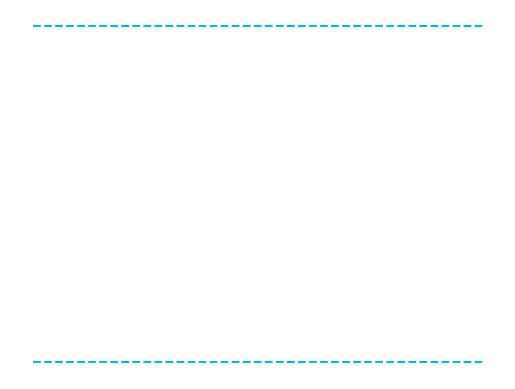

In [7]:

Matrix=np.array([[0] * len(Data1.index.values)]*len(Data2.index.values))
for i in range(0,len(Data1.index.values)):
    v=np.array([0]*i+[1]+[0]*(len(Data2.index.values)-i-1)).T
    for j in range(0,len(Data2)):
        if Data1.index.values[i]==Data2.index.values[j]:
            Matrix[j]=v
            break
Matrix=np.array(Matrix).T
print('维度交换矩阵',Matrix,sep='\n');pd.DataFrame(Matrix).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\E维度交换矩阵.csv')

# 维度交换后的秩均值矩阵
zhijunzhi2=zhijunzhi1.dot(Matrix)
print('秩均值矩阵2',zhijunzhi2,sep='\n');pd.DataFrame(zhijunzhi2,index=pinpais,columns=[i for i in range(0,12)]).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\F秩均值矩阵2.csv')

# 可达矩阵1
keda1=np.array([[0] * len(pinpais)]*len(pinpais))
for i in range(0,len(pinpais)):
    for j in range(0,len(pinpais)):
        flag=True
        if i == j:
            keda1[i,j]=1
            continue
        for k in range(0,len(PLTS.keys())):
            if zhijunzhi2[i,k]<zhijunzhi2[j,k]:
                flag=False
        keda1[i,j]=1 if flag else 0

print('可达矩阵1',keda1,sep='\n');pd.DataFrame(keda1,index=pinpais,columns=pinpais).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\G可达矩阵1.csv')

# 计算矩阵的布尔乘法
I=np.array([[0] * len(pinpais)]*len(pinpais))
for i in range(0,len(pinpais)):
    I[i,i]=1
R_I=keda1-I
Hasse_matrix=R_I-boolen_multi(R_I,R_I)
print('哈斯图矩阵1',Hasse_matrix,sep='\n');pd.DataFrame(Hasse_matrix,index=pinpais,columns=pinpais).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\H哈斯图矩阵1.csv')

# 绘制初始Hasse图
Hasse_list=[]
for i in range(0,len(pinpais)):
    for j in range(0,len(pinpais)):
        if Hasse_matrix[i,j]==1:
            print(pinpais[i],'占优于',pinpais[j])
            Hasse_list.append((pinpais[i],pinpais[j]))
G = nx.DiGraph()
G.add_edges_from(Hasse_list) # 添加边
pos=\
    {'ALBD': [5,1],
    'AND':[5,0],
    'QPL':[3,1],
     'LN':[5,2],
    'BNL':[7,1],
     'GRN':[4,1],
     'AT':[6,1],
     'TB':[3,1]
    }
nx.draw_networkx_nodes(G, pos, node_size=1300, alpha=0.3, node_color='r', nodelist=G.nodes(),node_shape='8')
nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=True)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Times New Roman')
plt.hlines(0.5, 2, 8, colors = "c", linestyles = "dashed") # 绘制y轴
plt.hlines(1.5, 2, 8, colors = "c", linestyles = "dashed") # 绘制y轴
plt.axis('off')
plt.show()

In [8]:
# 累计求和矩阵
leijiqiuhe=np.array([[0] * len(PLTS.keys())]*len(PLTS.keys()))
for i in range(0,len(PLTS.keys())):
    for j in range(0,len(PLTS.keys())):
        leijiqiuhe[i,j]=1 if i<=j else 0
print('累计求和矩阵',leijiqiuhe,sep='\n');pd.DataFrame(leijiqiuhe).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\I累计求和矩阵.csv')

累计求和矩阵
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1]]


In [9]:

# 保留两位小数的累加秩均值矩阵
leijiabianhuan2=zhijunzhi2.dot(leijiqiuhe)
print('累加变换矩阵2',leijiabianhuan2,sep='\n');pd.DataFrame(np.around(leijiabianhuan2,2),index=pinpais,columns=[i for i in range(0,12)]).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\J累加变换矩阵2.csv')

累加变换矩阵2
[[ 7.5  15.21 19.07 25.5  31.5  34.07 41.78 45.64 48.21 55.71 58.71 65.46]
 [ 9.   18.   27.   34.71 42.42 51.42 57.85 66.85 75.85 75.85 84.85 91.6 ]
 [ 3.86  7.72 12.86 12.86 16.72 21.86 24.86 32.57 37.71 40.71 45.85 52.6 ]
 [ 0.    2.57  3.86  6.86  6.86  8.15  8.15  9.44  9.44 18.44 25.94 27.94]
 [ 6.   12.43 18.86 27.86 36.86 45.86 49.46 55.89 62.32 68.32 75.82 77.82]
 [ 2.57  3.86  6.43  7.72 10.29 14.15 15.44 18.01 21.87 23.16 26.16 30.66]
 [ 0.    0.    0.    3.    4.29  4.29  8.79  8.79 10.08 14.58 15.87 24.87]
 [ 7.2  12.34 20.05 25.19 31.19 37.62 46.62 51.76 59.47 65.47 65.47 67.47]]


In [10]:
# 可达矩阵
keda2=np.array([[0] * len(pinpais)]*len(pinpais))
for i in range(0,len(pinpais)):
    for j in range(0,len(pinpais)):
        flag=True
        if i == j:
            keda2[i,j]=1
        for k in range(0,len(PLTS.keys())):
            # 只要有一个小于j，就说明i不占优于j
            if leijiabianhuan2[i,k]<leijiabianhuan2[j,k]:
                flag=False

        # 如果flag，则i占优于j
        keda2[i,j]=1 if flag else 0
        print(pinpais[i],pinpais[j],flag)
print('可达矩阵2',keda2,sep='\n')
pd.DataFrame(keda2,index=pinpais,columns=pinpais).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\J可达矩阵2.csv')

ALBD ALBD True
ALBD AND False
ALBD AT True
ALBD BNL True
ALBD GRN False
ALBD LN True
ALBD QPL True
ALBD TB False
AND ALBD True
AND AND True
AND AT True
AND BNL True
AND GRN True
AND LN True
AND QPL True
AND TB True
AT ALBD False
AT AND False
AT AT True
AT BNL True
AT GRN False
AT LN True
AT QPL True
AT TB False
BNL ALBD False
BNL AND False
BNL AT False
BNL BNL True
BNL GRN False
BNL LN False
BNL QPL False
BNL TB False
GRN ALBD False
GRN AND False
GRN AT True
GRN BNL True
GRN GRN True
GRN LN True
GRN QPL True
GRN TB False
LN ALBD False
LN AND False
LN AT False
LN BNL True
LN GRN False
LN LN True
LN QPL True
LN TB False
QPL ALBD False
QPL AND False
QPL AT False
QPL BNL False
QPL GRN False
QPL LN False
QPL QPL True
QPL TB False
TB ALBD False
TB AND False
TB AT True
TB BNL True
TB GRN False
TB LN True
TB QPL True
TB TB True
可达矩阵2
[[1 0 1 1 0 1 1 0]
 [1 1 1 1 1 1 1 1]
 [0 0 1 1 0 1 1 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 1 1 1 1 0]
 [0 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 1 0]
 [0 0 1 1 0 1 1 1]]


哈斯图矩阵2
[[0 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]]
ALBD 占优于 AT
AND 占优于 ALBD
AND 占优于 GRN
AND 占优于 TB
AT 占优于 LN
GRN 占优于 AT
LN 占优于 BNL
LN 占优于 QPL
TB 占优于 AT


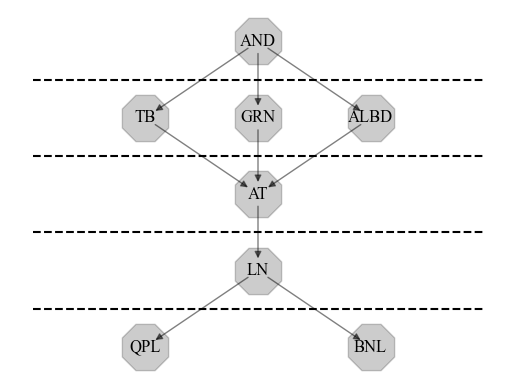

In [18]:

# 计算矩阵的布尔乘法
I=np.array([[0] * len(pinpais)]*len(pinpais))
for i in range(0,len(pinpais)):
    I[i,i]=1
R_I=keda2-I
Hasse_matrix=R_I-boolen_multi(R_I,R_I)
print('哈斯图矩阵2',Hasse_matrix,sep='\n');pd.DataFrame(Hasse_matrix,index=pinpais,columns=pinpais).to_csv('D:\python_common\代码_感知质量大论文\公开数据处理\感知质量数据集\随机占优积分过程\K哈斯图矩阵2.csv')

# 绘制哈斯图
Hasse_list=[]
for i in range(0,len(pinpais)):
    for j in range(0,len(pinpais)):
        if Hasse_matrix[i,j]==1:
            print(pinpais[i],'占优于',pinpais[j])
            Hasse_list.append((pinpais[i],pinpais[j]))
G = nx.DiGraph()
G.add_edges_from(Hasse_list) # 添加边
pos=\
    {'ALBD': [3,2],
    'AND':[2,3],
    'QPL':[1,-1],
     'LN':[2,0],
    'BNL':[3,-1],
     'TB':[1,2],
     'GRN':[2,2],
     'AT':[2,1],
    }
plt.hlines(0.5, 0, 4, colors = "black", linestyles = "dashed") # 绘制y轴
plt.hlines(1.5, 0, 4, colors = "black", linestyles = "dashed") # 绘制y轴
plt.hlines(2.5, 0, 4, colors = "black", linestyles = "dashed") # 绘制y轴
plt.hlines(-0.5, 0, 4, colors = "black", linestyles = "dashed") # 绘制y轴
# pos=\
#     {'ALBD': [3,-2],
#     'AND':[2,-3],
#     'QPL':[1,1],
#      'LN':[2,0],
#     'BNL':[3,1],
#      'TB':[1,-2],
#      'GRN':[2,-2],
#      'AT':[2,-1],
#     }
# plt.hlines(0.5, 0, 4, colors = "c", linestyles = "dashed") # 绘制y轴
# plt.hlines(-1.5, 0, 4, colors = "c", linestyles = "dashed") # 绘制y轴
# plt.hlines(-2.5, 0, 4, colors = "c", linestyles = "dashed") # 绘制y轴
# plt.hlines(-0.5, 0, 4, colors = "c", linestyles = "dashed") # 绘制y轴

nx.draw_networkx_nodes(G, pos, node_size=1300, alpha=0.2,  nodelist=G.nodes(),node_shape='8',node_color='black')
nx.draw_networkx_edges(G, pos, alpha=0.5, arrows=True)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='Times New Roman',font_color='black')
plt.axis('off')
plt.show() # 绘制哈斯图 ```